In [14]:
import pandas as pd
import numpy as np
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import gensim
from gensim import corpora

In [15]:
data = pd.read_csv('marvin.csv')
data = data.iloc[0:10000]

In [16]:
data = data['Text'].dropna()

In [17]:
data.shape

(9999,)

In [18]:
data = data.astype(str)

In [19]:
import nltk
from nltk import FreqDist

In [20]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marvin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# function to remove stopwords
def remove_stopwords(rev):
  rev_new = " ".join([i for i in rev if i not in stop_words])
  return rev_new

In [23]:
# remove short words (length < 3)
data = data.apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
data = [remove_stopwords(r.split()) for r in data]

# make entire text lowercase
data = [r.lower() for r in data]

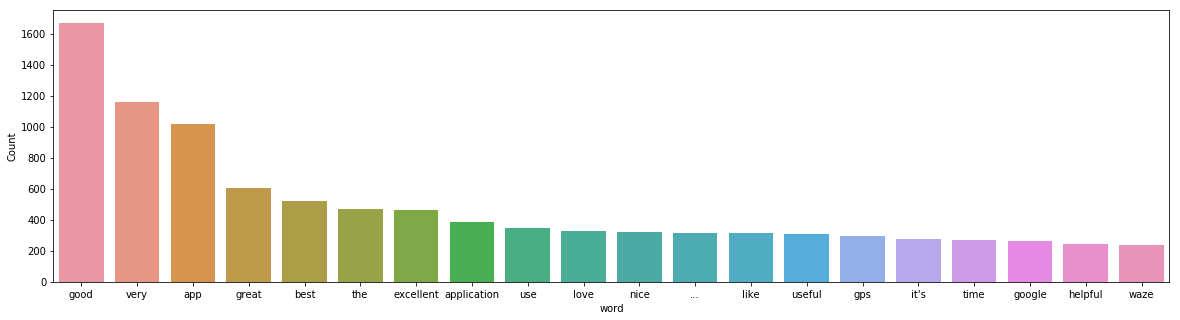

In [24]:
freq_words(data, 20)

In [25]:
nlp = spacy.load('en', disable=['parser', 'ner'])
def lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [37]:
tokenized_data = pd.Series(data).apply(lambda x: x.split())
print(tokenized_data[0])

['the', 'google', 'map', 'longer', 'available', 'relaxation', '...']


In [38]:
data_2 = lemmatization(tokenized_data)
print(data_2[0])

['map', 'available', 'relaxation']


In [81]:
# Create the term dictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(data_2)


# Convert list of reviews into a Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(i) for i in data_2]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel


# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=5, 
                random_state=100,
                chunksize=1000,
                passes=50)

In [82]:
lda_model.print_topics()

[(0,
  '0.061*"app" + 0.059*"nice" + 0.055*"love" + 0.048*"traffic" + 0.015*"application" + 0.014*"jam" + 0.009*"complete" + 0.009*"little" + 0.008*"radar" + 0.008*"uber"'),
 (1,
  '0.055*"useful" + 0.041*"helpful" + 0.025*"road" + 0.017*"street" + 0.016*"star" + 0.015*"voice" + 0.015*"route" + 0.015*"map" + 0.014*"place" + 0.014*"problem"'),
 (2,
  '0.044*"map" + 0.043*"gps" + 0.029*"route" + 0.023*"waze" + 0.021*"super" + 0.021*"time" + 0.021*"top" + 0.019*"well" + 0.018*"signal" + 0.016*"bad"'),
 (3,
  '0.290*"good" + 0.134*"app" + 0.091*"great" + 0.064*"excellent" + 0.046*"application" + 0.017*"thank" + 0.015*"navigation" + 0.013*"👍" + 0.010*"android" + 0.007*"speed"'),
 (4,
  '0.044*"use" + 0.040*"time" + 0.039*"lot" + 0.035*"work" + 0.035*"easy" + 0.033*"update" + 0.029*"accurate" + 0.026*"location" + 0.021*"cool" + 0.020*"day"')]

In [83]:
lda_model.get_document_topics(doc_term_matrix[5505], minimum_probability = None)

[(0, 0.10000006),
 (1, 0.10000005),
 (2, 0.10000005),
 (3, 0.5999998),
 (4, 0.10000005)]

In [59]:
doc_term_matrix[0]

[(0, 1), (1, 1), (2, 1)]

In [86]:
topics = []
probability = []
for a, b in lda_model[doc_term_matrix[5505]]:
    topics.append(a)
    probability.append(b)

In [ ]:
def get_doc_topic(corpus, model): 
        doc_topic = list() 
        for doc in corpus: 
            doc_topic.append(model.__getitem__(doc, eps=0)) 
        return doc_topic 